# Regressione Lineare Interattiva con Jupyter

Modifica i parametri con gli slider per vedere i grafici aggiornarsi in tempo reale!

Numero di dati: 1001
Primi 5 dati: [5.42 8.44 5.5  2.27 4.72]
Primi 5 dati: [64.25 96.8  53.87 30.05 66.26]
final w and b = 8.914834296827827, 9.771723621900207
final total cost: 33.894333031557686
the prediction for 8.52 hours of study is this vote: 85.7261118308733


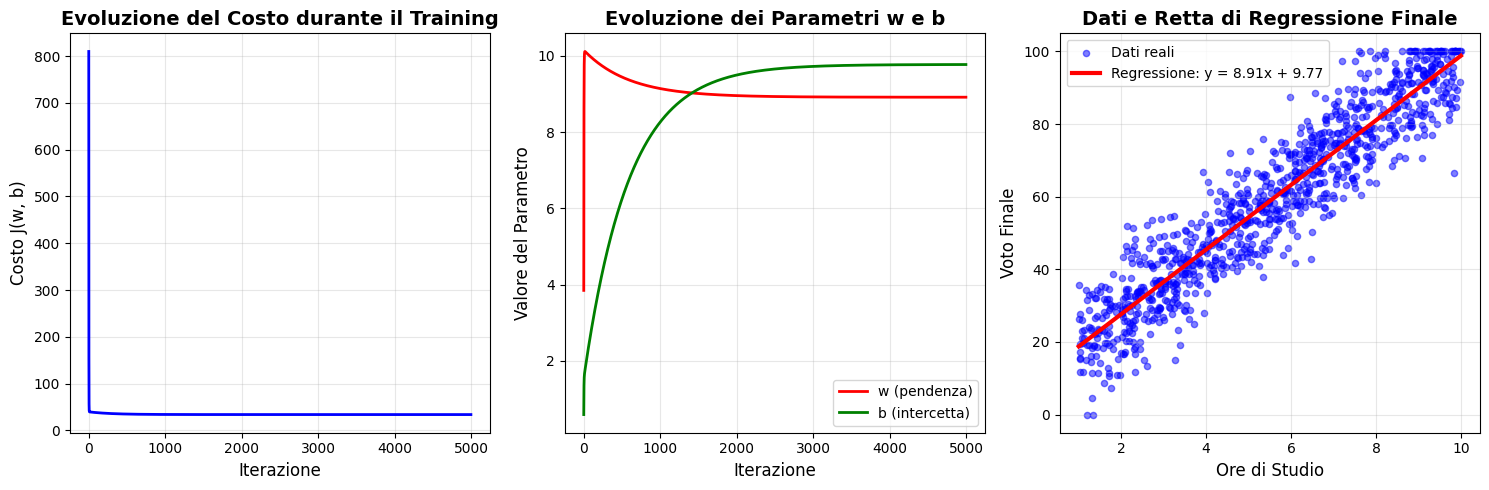


STATISTICHE DEL TRAINING
Costo iniziale: 809.74
Costo finale: 33.89
Riduzione del costo: 95.81%

Parametro w iniziale: 3.85
Parametro w finale: 8.91

Parametro b iniziale: 0.59
Parametro b finale: 9.77


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import display
from linear_regression import load_data_from_csv, compute_cost, compute_gradient, gradient_descent, predict

# Carica i dati
X, y = load_data_from_csv('dati_voti.csv')
m = len(X)

In [3]:
def plot_interactive(w_init=0.0, b_init=0.0, learning_rate=0.01, iterations=5000):
    """
    Funzione interattiva per visualizzare la regressione lineare
    """
    # Esegui il gradient descent
    final_w, final_b, history_j, history_params = gradient_descent(
        X, y, w_init, b_init, learning_rate, iterations, m
    )
    
    # Crea la figura con 4 subplot
    fig = plt.figure(figsize=(16, 10))
    
    # 1. Grafico del costo nel tempo
    plt.subplot(2, 3, 1)
    iterations_range = range(len(history_j))
    plt.plot(iterations_range, history_j, 'b-', linewidth=2)
    plt.xlabel('Iterazione', fontsize=12)
    plt.ylabel('Costo J(w, b)', fontsize=12)
    plt.title('Evoluzione del Costo durante il Training', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 2. Grafico dell'evoluzione dei parametri w e b
    plt.subplot(2, 3, 2)
    w_history = [params[0] for params in history_params]
    b_history = [params[1] for params in history_params]
    plt.plot(iterations_range, w_history, 'r-', linewidth=2, label='w (pendenza)')
    plt.plot(iterations_range, b_history, 'g-', linewidth=2, label='b (intercetta)')
    plt.xlabel('Iterazione', fontsize=12)
    plt.ylabel('Valore del Parametro', fontsize=12)
    plt.title('Evoluzione dei Parametri w e b', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Grafico dei dati con la retta di regressione finale
    plt.subplot(2, 3, 3)
    plt.scatter(X, y, alpha=0.5, s=20, color='blue', label='Dati reali')
    X_line = np.linspace(X.min(), X.max(), 100)
    y_line = final_w * X_line + final_b
    plt.plot(X_line, y_line, 'r-', linewidth=3, 
             label=f'Regressione: y = {final_w:.2f}x + {final_b:.2f}')
    plt.xlabel('Ore di Studio', fontsize=12)
    plt.ylabel('Voto Finale', fontsize=12)
    plt.title('Dati e Retta di Regressione Finale', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 4. Grafico del costo (più grande, in basso)
    plt.subplot(2, 3, (4, 6))
    plt.plot(iterations_range, history_j, 'b-', linewidth=2)
    plt.xlabel('Iterazione', fontsize=12)
    plt.ylabel('Costo J(w, b)', fontsize=12)
    plt.title(f'Costo Finale: {history_j[-1]:.4f} | w={final_w:.4f}, b={final_b:.4f}', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Stampa statistiche
    print("\n" + "="*60)
    print("STATISTICHE DEL TRAINING")
    print("="*60)
    print(f"Costo iniziale: {history_j[0]:.4f}")
    print(f"Costo finale: {history_j[-1]:.4f}")
    print(f"Riduzione del costo: {((history_j[0] - history_j[-1]) / history_j[0] * 100):.2f}%")
    print(f"\nParametro w iniziale: {w_history[0]:.4f}")
    print(f"Parametro w finale: {w_history[-1]:.4f}")
    print(f"\nParametro b iniziale: {b_history[0]:.4f}")
    print(f"Parametro b finale: {b_history[-1]:.4f}")
    print("="*60)

# Crea l'interfaccia interattiva
interact(plot_interactive,
         w_init=widgets.FloatSlider(value=0.0, min=-5.0, max=15.0, step=0.1, description='w iniziale'),
         b_init=widgets.FloatSlider(value=0.0, min=-10.0, max=20.0, step=0.1, description='b iniziale'),
         learning_rate=widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Learning Rate'),
         iterations=widgets.IntSlider(value=5000, min=100, max=10000, step=100, description='Iterazioni'))

interactive(children=(FloatSlider(value=0.0, description='w iniziale', max=15.0, min=-5.0), FloatSlider(value=…

<function __main__.plot_interactive(w_init=0.0, b_init=0.0, learning_rate=0.01, iterations=5000)>